In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import shortest_path
from scipy.linalg import eig
from sklearn import manifold

In [2]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

# creation du graphe d'adgacence et pretraitement

In [3]:
kng = kneighbors_graph(X_iris, 50, mode='distance')

In [4]:
def TriVP(Valp,Vectp):
    # trie dans l'ordre décroisant les valeurs propres
    # en cas de valeurs propres complexes on trie  selon leu module
    liste1 = Vectp.tolist()
    liste2 = Valp.tolist()
    norme = np.abs(Valp)
    liste3 = norme.tolist()

    result = zip(liste1, liste2,liste3)
    result_trie =sorted(result,key =itemgetter(2), reverse=True)
    liste1, liste2, liste3 =  zip(*result_trie)
    Vectp = np.asarray(liste1)
    Valp = np.asarray(liste2)
    
    return Valp,Vectp

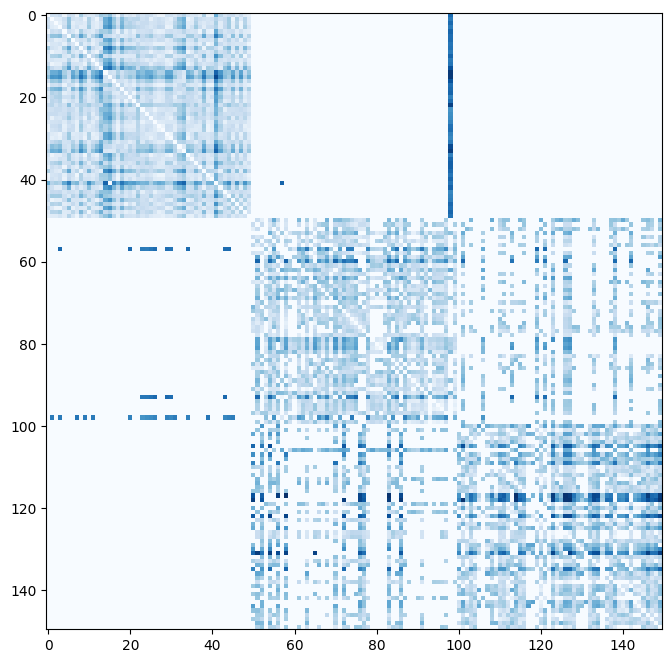

In [5]:
plt.figure(figsize=(8, 8))

plt.imshow(kng.todense(), cmap='Blues', interpolation='none')

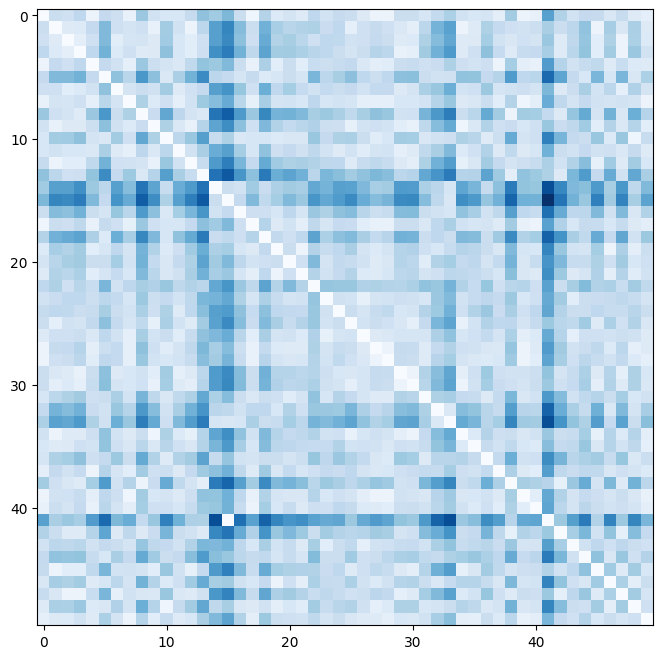

In [6]:
plt.figure(figsize=(8, 8))

plt.imshow(kng.todense()[:50, :50], cmap='Blues')

# Calcule des distances geodesiques

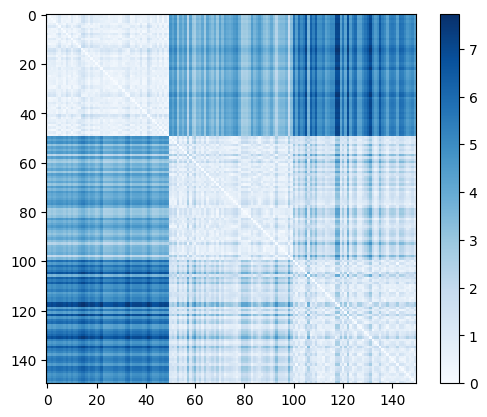

In [7]:
D = shortest_path(kng, directed=True)

plt.imshow(D, cmap='Blues', interpolation='none')
plt.colorbar()

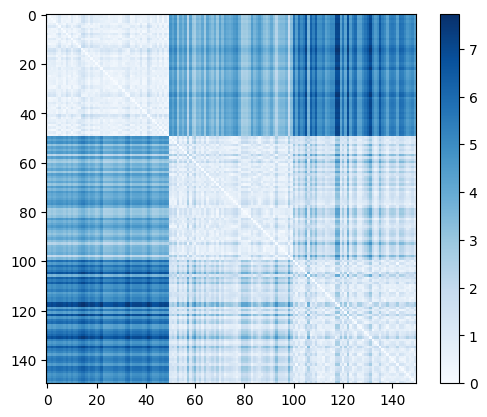

In [8]:
n_neighbors = 50
kng = kneighbors_graph(X_iris, n_neighbors=n_neighbors, mode='distance')

D = shortest_path(kng, directed=True)





plt.imshow(D, cmap='Blues', interpolation='none')
plt.colorbar()

/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


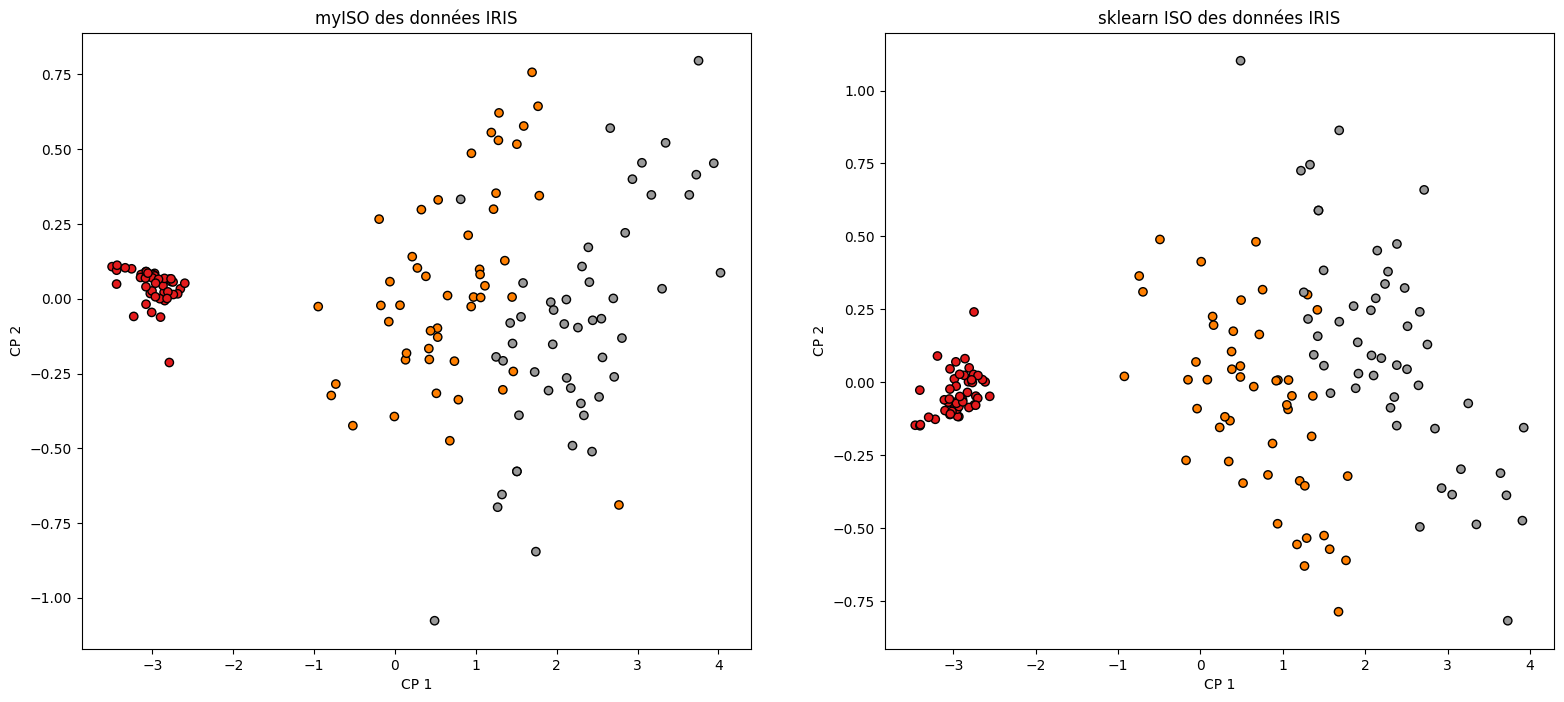

In [11]:
m = D.shape[0]
Id = np.eye(m)

ones = np.ones(m)

# B = -.5*(1 - 1/n_neighbors)* (Id - 1/m*ones)@(D**2)@(Id - 1/m*ones)
B = -.5* (Id - 1/m*ones)@(D**2)@(Id - 1/m*ones)

v, V = eig(B)
from operator import itemgetter

val_max, vec_max = TriVP(v,V)
Y = vec_max[:, :2]@np.diag(np.sqrt(val_max[:2]))

plt.subplots(nrows=1, ncols=2, figsize=(19, 8))
plt.subplot(1, 2, 1)
plt.scatter(Y[:, 0], Y[:, 1], c=y_iris, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('myISO des données IRIS')



X_iso = manifold.Isomap(n_neighbors=50, n_components=2).fit_transform(X_iris)
plt.subplot(1, 2, 2)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y_iris, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('sklearn ISO des données IRIS')
plt.show()

In [35]:
from multi_dimensionnal_scaling import multi_dimendional_scalling as MDS

def MDS(data, n_neighbors=50, n_components=2):
    """
    This function takes a dataframe and returns a dataframe with n_components
    columns that are the result of the multi-dimensional scalling.
    """

    # Import the necessary libraries
    kng = kneighbors_graph(data, n_neighbors=n_neighbors, mode='distance')
    D = shortest_path(kng, directed=True)

    m = D.shape[0]
    Id = np.eye(m)

    ones = np.ones(m)

    # B = -.5*(1 - 1/n_neighbors)* (Id - 1/m*ones)@(D**2)@(Id - 1/m*ones)
    B = -.5* (Id - 1/m*ones)@(D**2)@(Id - 1/m*ones)

    v, V = np.linalg.eig(B)

    val_max, vec_max = TriVP(v,V)
    Y = vec_max[:, :n_components]@np.diag(np.sqrt(val_max[:n_components]))
    return Y

In [27]:
mnist = datasets.load_digits()
X_mnist = mnist.data
y_mnist = mnist.target

In [28]:
y_mnist

array([0, 1, 2, ..., 8, 9, 8])

In [29]:
mean_feature_per_class = np.mean([np.sum(y_mnist == classe) for classe in np.unique(y_mnist)])
mean_feature_per_class = int(mean_feature_per_class)

In [33]:

Y = MDS(X_mnist, n_neighbors=mean_feature_per_class, n_components=2)

/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/tmp/ipykernel_9217/2606169175.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_9217/2606169175.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


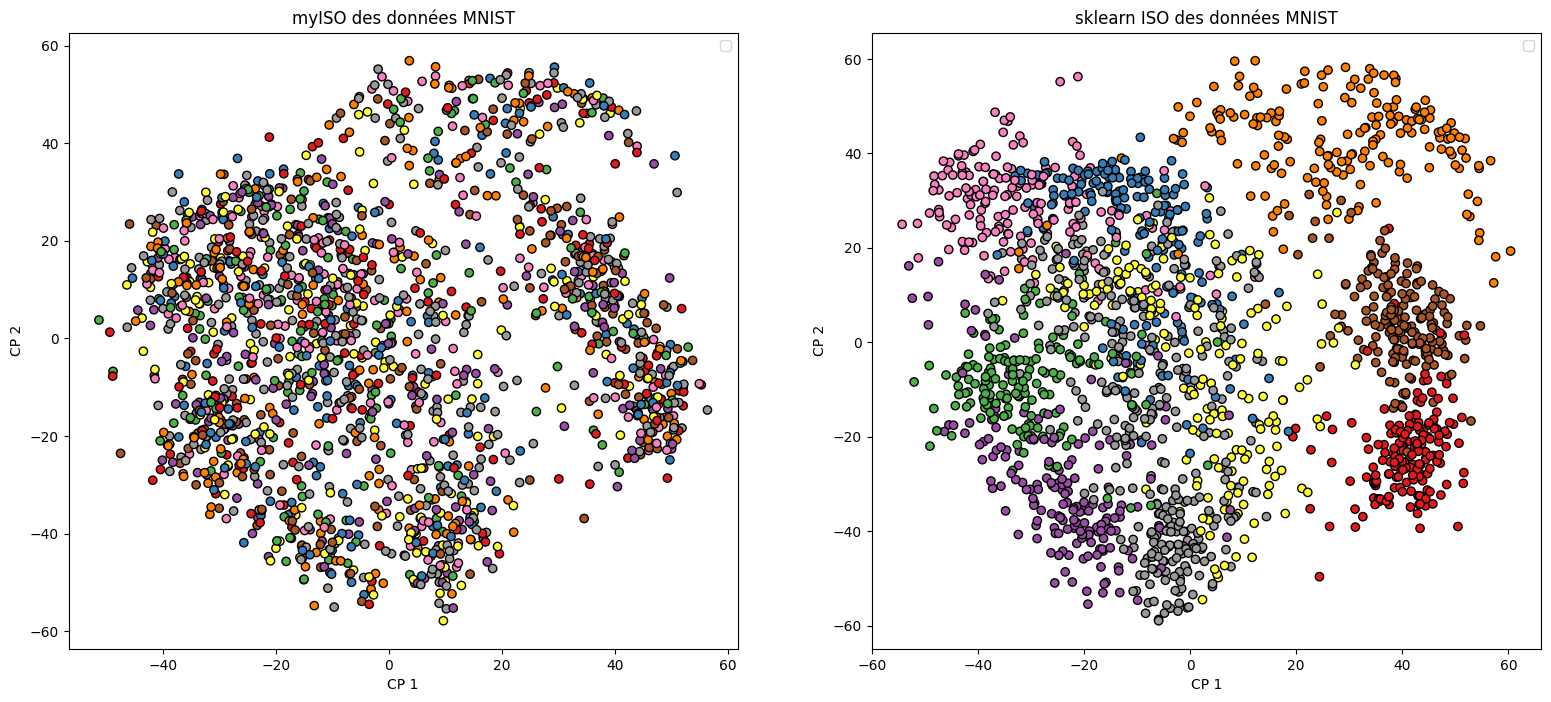

In [37]:

plt.subplots(nrows=1, ncols=2, figsize=(19, 8))
plt.subplot(1, 2, 1)
plt.scatter(Y[:, 0], Y[:, 1], c=y_mnist, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('myISO des données MNIST')
plt.legend()



X_iso = manifold.Isomap(n_neighbors=100, n_components=2).fit_transform(X_mnist)
plt.subplot(1, 2, 2)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y_mnist, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('sklearn ISO des données MNIST')
plt.legend()
plt.show()